In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
import pandas as pd
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
import splitfolders
logging.getLogger("tensorflow").setLevel(logging.ERROR)
print ('modules loaded')

modules loaded


# Creating the Training dataset

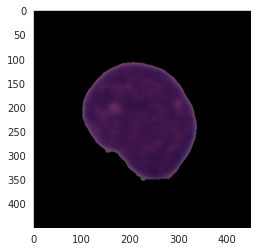

In [6]:
img = image.load_img('data/training_data/ALL/UID_1_6_1_all.bmp')

plt.imshow(img)
plt.grid(False)

In [7]:
cv2.imread('data/training_data/ALL/UID_1_6_1_all.bmp').max()

119

In [8]:
cv2.imread('data/training_data/ALL/UID_1_6_1_all.bmp').shape

(450, 450, 3)

In [9]:
splitfolders.ratio('data/training_data', 
                   output='data/inputs/',
                   ratio=(.8, 0.2),
                   seed=42,
                  ) 

Copying files: 10661 files [00:32, 324.13 files/s]


In [10]:
traingen = ImageDataGenerator(rescale=1/255,
                              rotation_range=10, fill_mode='nearest',
                              horizontal_flip=True,
                              vertical_flip=True,
                              brightness_range=[0.6,1.5],
                             )

valgen = ImageDataGenerator(rescale=1/255)

train_dataset = traingen.flow_from_directory(directory='data/inputs/train',
                                             class_mode='binary',
                                             seed=42
                                            )

val_dataset = valgen.flow_from_directory(directory='data/inputs/val',
                                         class_mode='binary',
                                         seed=42
                                        )

Found 8528 images belonging to 2 classes.
Found 2133 images belonging to 2 classes.


In [11]:
len(train_dataset.classes)

8528

In [12]:
len(val_dataset.classes)

2133

In [13]:
type(train_dataset)

keras.preprocessing.image.DirectoryIterator

In [14]:
type(train_dataset)

keras.preprocessing.image.DirectoryIterator

In [15]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(train_dataset.classes),
                                                  y=train_dataset.classes
                                                 )

train_class_weights = dict(enumerate(class_weights))

In [17]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(units=64, activation='relu'))
baseline_model.add(Flatten())
baseline_model.add(layers.Dense(units=1, activation='sigmoid'))

baseline_model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy',
                       metrics=['accuracy']
                      )

baseline_history = baseline_model.fit(train_dataset,
                                      class_weight=train_class_weights,
                                      steps_per_epoch=41,
                                      epochs=50,
                                      batch_size=256,
                                      validation_data=val_dataset,
                                      shuffle=True
                                     )

/home/patrick/.local/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/50
41/41 [==============================] - 113s 3s/step - loss: 7.3865 - accuracy: 0.6738 - val_loss: 6.4005 - val_accuracy: 0.3179
Epoch 2/50
41/41 [==============================] - 112s 3s/step - loss: 3.9178 - accuracy: 0.6463 - val_loss: 0.6526 - val_accuracy: 0.6850
Epoch 3/50
41/41 [==============================] - 115s 3s/step - loss: 1.7636 - accuracy: 0.6845 - val_loss: 0.5260 - val_accuracy: 0.7361
Epoch 4/50
41/41 [==============================] - 114s 3s/step - loss: 0.9509 - accuracy: 0.7210 - val_loss: 0.5784 - val_accuracy: 0.6835
Epoch 5/50
41/41 [==============================] - 114s 3s/step - loss: 0.7082 - accuracy: 0.7348 - val_loss: 0.6884 - val_accuracy: 0.4590
Epoch 6/50
41/41 [==============================] - 113s 3s/step - loss: 0.5729 - accuracy: 0.7508 - val_loss: 0.6347 - val_accuracy: 0.7257
Epoch 7/50
41/41 [==============================] - 112s 3s/step - loss: 0.5745 - accuracy: 0.7241 - val_loss: 0.6085 - val_accuracy: 0.7525
Epoch 8/50
41

In [22]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

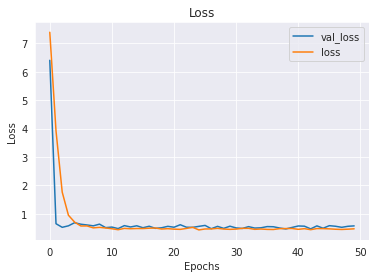

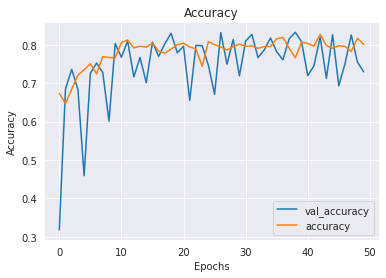

In [23]:
visualize_training_results(baseline_history)

# Creating the Testing dataset

In [ ]:
img = image.load_img('data/test_data/7.bmp')

plt.imshow(img)
plt.grid(False)

In [ ]:
cv2.imread('data/test_data/7.bmp').max()

In [ ]:
cv2.imread('data/test_data/7.bmp').shape

In [ ]:
test_df = pd.read_csv('data/test_data/test_data_labels.csv')

test_df = test_df.replace({'labels':{0 : 'ALL', 1 : 'Normal'}})

testgen = ImageDataGenerator(rescale=1/255)

test_dataset = testgen.flow_from_dataframe(test_df,
                                         directory='data/test_data',
                                         x_col='new_names',
                                         y_col='labels',
                                         class_mode='binary',
                                         target_size=(350, 350),
                                         batch_size=1,
                                         seed=42
                                        )

In [ ]:
test_dataset.class_indices

In [ ]:
test_dataset.classes

In [ ]:
type(test_dataset)

In [ ]:
test_dataset[1]